In [2]:
%pip install -q -U bitsandbytes
%pip install -q -U git+https://github.com/huggingface/transformers.git
%pip install -q -U git+https://github.com/huggingface/peft.git
%pip install -q -U git+https://github.com/huggingface/accelerate.git
%pip install -q -U datasets scipy ipywidgets matplotlib


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 2.14.7 requires fsspec[http]<=2023.10.0,>=2023.1.0, but you have fsspec 2024.3.1 which is incompatible.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location

In [ ]:
%pip install torch==2.2.2

In [8]:
%pip install torchtext==0.17.2

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 8.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [1]:
from accelerate import FullyShardedDataParallelPlugin, Accelerator
from torch.distributed.fsdp.fully_sharded_data_parallel import FullOptimStateDictConfig, FullStateDictConfig

fsdp_plugin = FullyShardedDataParallelPlugin(
    state_dict_config=FullStateDictConfig(offload_to_cpu=True, rank0_only=False),
    optim_state_dict_config=FullOptimStateDictConfig(offload_to_cpu=True, rank0_only=False),
)

accelerator = Accelerator(fsdp_plugin=fsdp_plugin)

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [54]:
import json
draft_codes = dict()
with open("RuMedTop3.jsonl", "r") as f:
    lines = f.readlines()
    for line in lines:
        rec = json.loads(line)
        if not rec["code"] in draft_codes:
            draft_codes[rec["code"]] = []
        for pred in rec["prediction"]:
            if pred != rec["code"]:
                draft_codes[rec["code"]].append(pred)
print(len(draft_codes))

104


In [2]:
import json
draft_codes = set()
draft_cnt = dict()
with open("rumedtop3/train_v1.jsonl", "r") as f:
    lines = f.readlines()
    for line in lines:
        rec = json.loads(line)
        draft_codes.add(rec["code"])
        if not rec["code"] in draft_cnt:
            draft_cnt[rec["code"]] = 0
        draft_cnt[rec["code"]] += 1
print(len(draft_codes))

105


In [79]:
data_cnt = dict()
with open("rumedtop3/train_v1.jsonl", "r") as f:
    lines = f.readlines()
with open("rumedtop3/train_eq.jsonl", "w") as f:
     for line in lines:
        rec = json.loads(line)
        copies = max(1, int(round(100 / draft_cnt[rec["code"]])))
        if not rec["code"] in data_cnt:
            data_cnt[rec["code"]] = 0
        
        for _ in range(copies):
            if data_cnt[rec["code"]] >= 100:
                break
            f.write(line)
            data_cnt[rec["code"]] += 1

In [2]:
draft_cnt

{'M17': 34,
 'M53': 35,
 'K29': 77,
 'M54': 560,
 'E27': 11,
 'G43': 25,
 'J00': 37,
 'I11': 249,
 'N41': 91,
 'E28': 22,
 'M77': 23,
 'J06': 114,
 'N20': 53,
 'G90': 152,
 'G52': 38,
 'N92': 11,
 'J84': 24,
 'G44': 132,
 'L50': 11,
 'G54': 229,
 'G40': 58,
 'M13': 86,
 'L70': 17,
 'E11': 55,
 'D25': 60,
 'N76': 82,
 'N97': 36,
 'M19': 74,
 'N86': 29,
 'E05': 38,
 'F41': 13,
 'N28': 22,
 'M51': 29,
 'N95': 53,
 'J45': 47,
 'E03': 20,
 'D50': 28,
 'K80': 28,
 'M10': 18,
 'J30': 61,
 'E06': 166,
 'K21': 58,
 'G62': 24,
 'G56': 16,
 'J41': 14,
 'I83': 20,
 'N30': 56,
 'H81': 23,
 'E66': 108,
 'G20': 112,
 'E04': 60,
 'E74': 12,
 'L40': 25,
 'J01': 20,
 'N81': 25,
 'M75': 32,
 'N40': 29,
 'E01': 45,
 'I67': 50,
 'N39': 23,
 'N84': 19,
 'M02': 49,
 'E89': 26,
 'K52': 12,
 'J42': 28,
 'L20': 22,
 'N34': 12,
 'G98': 34,
 'J32': 16,
 'M42': 21,
 'L21': 21,
 'I20': 37,
 'I10': 40,
 'N94': 16,
 'M06': 18,
 'K81': 50,
 'J35': 32,
 'M05': 22,
 'M15': 19,
 'N80': 39,
 'G25': 25,
 'N83': 33,
 'G50':

In [3]:
codes_lines = dict()
with open("train_prefix.txt", "r") as f:
    idx = 1
    lines = f.readlines()
    for line in lines:
        line = line.split('. ')[1].split('\n')[0]
        if not line[:3] in draft_codes:
            continue
        codes_lines[line[:3]] = f"{line[5:]} ({line[:3]})"
        idx += 1
print(len(codes_lines))

105


In [4]:
codes_lines

{'D23': 'Другие доброкачественные новообразования кожи (D23)',
 'D25': 'Лейомиома матки (D25)',
 'D50': 'Железодефицитная анемия (D50)',
 'E01': 'Заболевания щитовидной железы, связанные с дефицитом йода, и сопутствующие заболевания (E01)',
 'E03': 'Другой гипотиреоз (E03)',
 'E04': 'Другой нетоксический зоб (E04)',
 'E05': 'Тиреотоксикоз [гипертиреоз] (E05)',
 'E06': 'Тиреоидит (E06)',
 'E11': 'Сахарный диабет 2 типа (E11)',
 'E22': 'Гиперфункция гипофиза (E22)',
 'E27': 'Другие заболевания надпочечников (E27)',
 'E28': 'Дисфункция яичников (E28)',
 'E66': 'Избыточный вес и ожирение (E66)',
 'E74': 'Другие нарушения углеводного обмена (E74)',
 'E89': 'Постпроцедурные эндокринные и метаболические осложнения и нарушения, не классифицированные в других рубриках (E89)',
 'F41': 'Другие тревожные расстройства (F41)',
 'G20': 'болезнь Паркинсона (G20)',
 'G25': 'Другие экстрапирамидные и двигательные расстройства. (G25)',
 'G30': 'Болезнь Альцгеймера (G30)',
 'G35': 'Рассеянный склероз (G35

In [4]:
PREFIX_DIAGS = """Возможные диагнозы:
{}""".format('\n'.join(codes_lines))
print(PREFIX_DIAGS)

Возможные диагнозы:
1. D23: Другие доброкачественные новообразования кожи
2. D25: Лейомиома матки
3. D50: Железодефицитная анемия
4. E01: Заболевания щитовидной железы, связанные с дефицитом йода, и сопутствующие заболевания
5. E03: Другой гипотиреоз
6. E04: Другой нетоксический зоб
7. E05: Тиреотоксикоз [гипертиреоз]
8. E06: Тиреоидит
9. E11: Сахарный диабет 2 типа
10. E22: Гиперфункция гипофиза
11. E27: Другие заболевания надпочечников
12. E28: Дисфункция яичников
13. E66: Избыточный вес и ожирение
14. E74: Другие нарушения углеводного обмена
15. E89: Постпроцедурные эндокринные и метаболические осложнения и нарушения, не классифицированные в других рубриках
16. F41: Другие тревожные расстройства
17. G20: болезнь Паркинсона
18. G25: Другие экстрапирамидные и двигательные расстройства.
19. G30: Болезнь Альцгеймера
20. G35: Рассеянный склероз
21. G37: Другие демиелинизирующие заболевания центральной нервной системы.
22. G40: Эпилепсия и повторяющиеся припадки
23. G43: Мигрень
24. G44: 

In [2]:
import json
def load_dataset_rumedtop3(path):
    with open(path, "r") as f:
        records = [json.loads(rec) for rec in f.readlines()]
    return records

In [3]:
from datasets import Dataset
train_dataset = Dataset.from_list(load_dataset_rumedtop3("rumedtop3/train_eq.jsonl")).shuffle()
eval_dataset = Dataset.from_list(load_dataset_rumedtop3("rumedtop3/dev_v1.jsonl"))
test_dataset = Dataset.from_list(load_dataset_rumedtop3("rumedtop3/test_v1.jsonl"))

In [4]:
print(test_dataset[0])

{'idx': 'qaf1454f', 'symptoms': 'Головную боль, "мелькание мушек перед глазами " на фоне повышения цифр АД до 150\\100 мм.рт.ст., учащенное сердцебиение', 'code': 'I11'}


In [8]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "BioMistral/BioMistral-7B"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(base_model_id, quantization_config=bnb_config)

`low_cpu_mem_usage` was None, now set to True since model is quantized.


In [9]:
tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_eos_token=True,
    add_bos_token=True, 
)

In [10]:
def tokenize(prompt):
    result = tokenizer(prompt)
    result["labels"] = result["input_ids"].copy()
    return result

In [11]:
import random
def generate_and_tokenize_prompt(data_point):
    full_prompt =f"""Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
{data_point["symptoms"]}

### Ответ:
{codes_lines[data_point["code"]]}
"""
    return tokenize(full_prompt)


In [12]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)

Parameter 'function'=<function generate_and_tokenize_prompt at 0x7fa30c4b35b0> of the transform datasets.arrow_dataset.Dataset._map_single couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.
Map: 100%|██████████| 848/848 [00:00<00:00, 2839.75 examples/s]


In [13]:
untokenized_text = tokenizer.decode(tokenized_train_dataset[0]['input_ids']) 
print(untokenized_text)

2024-04-16 16:21:19.107816: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


<s> Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
высыпания на коже лица, сопровождается зудом, покалыванием;

### Ответ:
Розацеа (L71)
</s>


11073


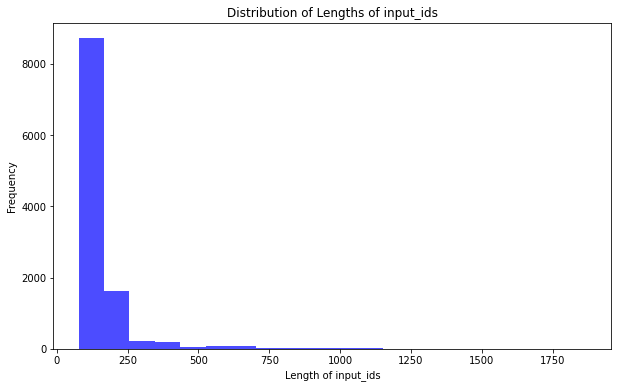

In [14]:
import matplotlib.pyplot as plt

def plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset):
    lengths = [len(x['input_ids']) for x in tokenized_train_dataset]
    lengths += [len(x['input_ids']) for x in tokenized_val_dataset]
    print(len(lengths))

    # Plotting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(lengths, bins=20, alpha=0.7, color='blue')
    plt.xlabel('Length of input_ids')
    plt.ylabel('Frequency')
    plt.title('Distribution of Lengths of input_ids')
    plt.show()

plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [15]:
max_length = 512

tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    padding_side="left",
    add_eos_token=True,  
    add_bos_token=True,  
)
tokenizer.pad_token = tokenizer.eos_token


def tokenize(prompt):
    result = tokenizer(
        prompt,
        truncation=True,
        max_length=max_length,
        padding="max_length",
    )
    result["labels"] = result["input_ids"].copy()
    return result

In [16]:
tokenized_train_dataset = train_dataset.map(generate_and_tokenize_prompt)
tokenized_val_dataset = eval_dataset.map(generate_and_tokenize_prompt)

Map: 100%|██████████| 848/848 [00:00<00:00, 1925.38 examples/s]


In [17]:
print(tokenized_train_dataset[4]['input_ids'])

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

You can also untokenize to see it in plain text. It should start with `<s>` and end with `</s>`.

In [18]:
untokenized_text = tokenizer.decode(tokenized_train_dataset[1]['input_ids']) 
print(untokenized_text)

</s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s></s>

11073


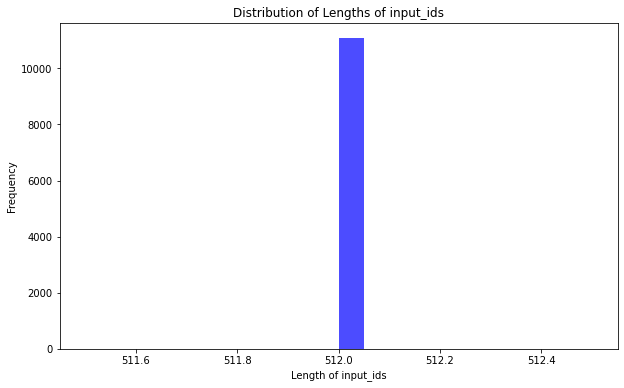

In [19]:
plot_data_lengths(tokenized_train_dataset, tokenized_val_dataset)

In [20]:
print("Symptoms: " + test_dataset[2]['symptoms'] + "\n")
print("Answer: " + test_dataset[2]['code'] + "\n")

Symptoms: Подергивания нижнего века периодически, приступы с периодичностью 2 раза в месяц, появление темного пятна, постепенно смещающееся влево, плаксивость, "каша" в голове, нарушение сна, снижение массы тела, снижение аппетита

Answer: G90



In [21]:
eval_prompt = f"""Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
{test_dataset[2]['symptoms']}

### Ответ:
"""
print(eval_prompt)

Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
Подергивания нижнего века периодически, приступы с периодичностью 2 раза в месяц, появление темного пятна, постепенно смещающееся влево, плаксивость, "каша" в голове, нарушение сна, снижение массы тела, снижение аппетита

### Ответ:



In [22]:
model = accelerator.prepare_model(model)

In [23]:
eval_tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token=True,
)

In [24]:
device = "cuda"
model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to(device)

In [25]:
model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(model.generate(**model_input, max_new_tokens=15)[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
Подергивания нижнего века периодически, приступы с периодичностью 2 раза в месяц, появление темного пятна, постепенно смещающееся влево, плаксивость, "каша" в голове, нарушение сна, снижение массы тела, снижение аппетита

### Ответ:
М20.0 - Опухоли мозга и го


In [26]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

In [27]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param}"
    )

In [28]:
print(model)

MistralForCausalLM(
  (model): MistralModel(
    (embed_tokens): Embedding(32000, 4096)
    (layers): ModuleList(
      (0-31): 32 x MistralDecoderLayer(
        (self_attn): MistralSdpaAttention(
          (q_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (k_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (v_proj): Linear4bit(in_features=4096, out_features=1024, bias=False)
          (o_proj): Linear4bit(in_features=4096, out_features=4096, bias=False)
          (rotary_emb): MistralRotaryEmbedding()
        )
        (mlp): MistralMLP(
          (gate_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (up_proj): Linear4bit(in_features=4096, out_features=14336, bias=False)
          (down_proj): Linear4bit(in_features=14336, out_features=4096, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): MistralRMSNorm()
        (post_attention_layernorm): MistralRMSNorm()
      )
    )

In [29]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=8,
    lora_alpha=16,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lm_head",
    ],
    bias="none",
    lora_dropout=0.05,  # Conventional
    task_type="CAUSAL_LM",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

# Apply the accelerator. You can comment this out to remove the accelerator.
model = accelerator.prepare_model(model)

trainable params: 21260288 || all params: 3773331456 || trainable%: 0.5634354746703705


In [30]:
print(model)

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): MistralForCausalLM(
      (model): MistralModel(
        (embed_tokens): Embedding(32000, 4096)
        (layers): ModuleList(
          (0-31): 32 x MistralDecoderLayer(
            (self_attn): MistralSdpaAttention(
              (q_proj): lora.Linear4bit(
                (base_layer): Linear4bit(in_features=4096, out_features=4096, bias=False)
                (lora_dropout): ModuleDict(
                  (default): Dropout(p=0.05, inplace=False)
                )
                (lora_A): ModuleDict(
                  (default): Linear(in_features=4096, out_features=8, bias=False)
                )
                (lora_B): ModuleDict(
                  (default): Linear(in_features=8, out_features=4096, bias=False)
                )
                (lora_embedding_A): ParameterDict()
                (lora_embedding_B): ParameterDict()
              )
              (k_proj): lora.Linear4bit(
                (base_layer): L

In [31]:
# pip install -q wandb -U

import wandb, os
wandb.login()

wandb_project = "biomistral-finetune-rumedbert-2"
if len(wandb_project) > 0:
    os.environ["WANDB_PROJECT"] = wandb_project

wandb: Currently logged in as: owlus (gfr). Use `wandb login --relogin` to force relogin


In [32]:
if torch.cuda.device_count() > 1: # If more than 1 GPU
    model.is_parallelizable = True
    model.model_parallel = True

In [33]:
len(tokenized_train_dataset)

10225

In [ ]:
import transformers
from datetime import datetime

project = "rumedbert-finetune-3"
base_model_name = "biomistral"
run_name = base_model_name + "-" + project
output_dir = "./" + run_name

tokenizer.pad_token = tokenizer.eos_token

trainer = transformers.Trainer(
    model=model,
    train_dataset=tokenized_train_dataset,
    eval_dataset=tokenized_val_dataset,
    args=transformers.TrainingArguments(
        output_dir=output_dir,
        warmup_steps=5,
        per_device_train_batch_size=4,
        gradient_checkpointing=False,
        gradient_accumulation_steps=4,
        max_steps=2000,
        learning_rate=1e-5, # Want about 10x smaller than the Mistral learning rate
        logging_steps=50,
        bf16=True,
        optim="paged_adamw_8bit",
        logging_dir="./logs",        # Directory for storing logs
        save_strategy="steps",       # Save the model checkpoint every logging step
        save_steps=200,                # Save checkpoints every 50 steps
        evaluation_strategy="steps", # Evaluate the model every logging step
        eval_steps=100,              # Evaluate and save checkpoints every 50 steps
        do_eval=True,                # Perform evaluation at the end of training
        report_to="wandb",           # Comment this out if you don't want to use weights & baises
        run_name=f"{run_name}-{datetime.now().strftime('%Y-%m-%d-%H-%M')}",          # Name of the W&B run (optional)
    ),
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
)

model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

/home/jupyter/.local/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/torch/utils/checkpoi

{'loss': 0.6233, 'grad_norm': 5.460607051849365, 'learning_rate': 6.015037593984962e-06, 'epoch': 1.25}



 99%|█████████▉| 105/106 [00:58<00:00,  1.76it/s]
                                                      
100%|██████████| 106/106 [00:59<00:00,  1.77it/s]
                                                 /home/jupyter/.local/lib/python3.10/site-packages/peft/utils/save_and_load.py:139: UserWarning: Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.
  warnings.warn("Setting `save_embedding_layers` to `True` as embedding layers found in `target_modules`.")


{'eval_loss': 0.8103564977645874, 'eval_runtime': 60.0968, 'eval_samples_per_second': 14.111, 'eval_steps_per_second': 1.764, 'epoch': 1.25}


/home/jupyter/.local/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/home/jupyter/.local/lib/python3.10/site-packages/torch/utils/checkpoi

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig

base_model_id = "BioMistral/BioMistral-7B"
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

base_model = AutoModelForCausalLM.from_pretrained(
    base_model_id,  # Mistral, same as before
    quantization_config=bnb_config,  # Same quantization config as before
    device_map="auto",
    trust_remote_code=True,
)

eval_tokenizer = AutoTokenizer.from_pretrained(
    base_model_id,
    add_bos_token=True,
    trust_remote_code=True,
)

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:124: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [8]:
from peft import PeftModel

ft_model = PeftModel.from_pretrained(base_model, "biomistral-rumedbert-finetune-3/checkpoint-1200")

Let's try the same `eval_prompt` and thus `model_input` as above, and see if the new finetuned model performs better. Since the training loss didn't converge, we can expect that the model won't perform excellently, but it should be at least better than the original model.

In [6]:
test_dataset[4]['code']

'J20'

In [15]:
eval_prompt = f"""Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
{test_dataset[4]["symptoms"]}

### Ответ:
"""

model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

ft_model.eval()
with torch.no_grad():
    print(eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=25)[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
на кашель с мокротой, тяжесть в правой половине грудной клетки, заложенность носа

### Ответ:
Хронический синусит (J32)

### Ответ:
Другие ин


In [65]:
eval_prompt = f"""Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
{test_dataset[1]["symptoms"]}

### Ответ:
J4"""

model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")

In [66]:
res = ft_model.forward(**model_input)['logits'][0, -1].cpu()

In [72]:
eval_tokenizer.decode(np.argsort(res)[-3])

'2'

In [20]:
res = ft_model.forward(**model_input)

In [29]:
logits = res['logits']

In [32]:
logits = logits.cpu()
import numpy as np

tensor(23676782)

In [42]:
eval_tokenizer.decode(np.argmax(logits[0, -1]))

'J'

In [40]:
test_dataset

Dataset({
    features: ['idx', 'symptoms', 'code'],
    num_rows: 822
})

In [56]:
res = ft_model.forward(**model_input)

In [59]:
res['logits'][0][-1]

tensor([-8.5859, -7.4805,  0.3579,  ..., -5.8398, -7.1367, -3.6719],
       device='cuda:0')

In [ ]:
code_tree = 

In [ ]:
acc = []
import tqdm
import numpy as np
for i in tqdm.tqdm(range(len(test_dataset))):
    sample = test_dataset[i]
    eval_prompt = f"""Ты профессиональный медицинский ассистент. Ответь, к какому диагнозу по ICD-10 относится это описание

### Описание:
{sample['symptoms']}

### Ответ:
"""
    model_input = eval_tokenizer(eval_prompt, return_tensors="pt").to("cuda")
    res_text = eval_tokenizer.decode(ft_model.generate(**model_input, max_new_tokens=30)[0], skip_special_tokens=True)
    res_text = res_text.split('Ответ:\n')[1].split('(')
    if len(res_text) > 1:
        pred_code = res_text[1][:3]
        if pred_code == sample['code']:
            acc.append(1)
        else:
            print(pred_code, sample['code'])
            acc.append(0)
        print(np.mean(acc))

  0%|          | 1/822 [00:03<43:12,  3.16s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


1.0


  0%|          | 2/822 [00:06<43:18,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


1.0


  0%|          | 3/822 [00:09<43:32,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


G96 G90
0.6666666666666666


  0%|          | 4/822 [00:12<43:27,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


K29 K58
0.5


  1%|          | 5/822 [00:15<43:16,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


J32 J20
0.4


  1%|          | 6/822 [00:19<43:19,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.5


  1%|          | 8/822 [00:25<43:00,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


J30 J01
0.42857142857142855


  1%|          | 9/822 [00:28<43:11,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


I11 J84
0.375


  1%|          | 10/822 [00:31<43:02,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


G62 G54
0.3333333333333333


  1%|▏         | 11/822 [00:35<43:10,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.4


  1%|▏         | 12/822 [00:38<43:12,  3.20s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


E27 I11
0.36363636363636365


  2%|▏         | 13/822 [00:41<43:09,  3.20s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


N93 N92
0.3333333333333333


  2%|▏         | 14/822 [00:44<43:01,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


I11 I10
0.3076923076923077


  2%|▏         | 15/822 [00:47<42:49,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


K21 K80
0.2857142857142857


  2%|▏         | 17/822 [00:54<42:41,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


N76 D23
0.26666666666666666


  2%|▏         | 18/822 [00:57<42:38,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.3125


  2%|▏         | 19/822 [01:00<42:42,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


J00 J06
0.29411764705882354


  2%|▏         | 20/822 [01:03<42:34,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


N93 N83
0.2777777777777778


  3%|▎         | 21/822 [01:06<42:25,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


E28 N91
0.2631578947368421


  3%|▎         | 22/822 [01:10<42:30,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


E06 E03
0.25


  3%|▎         | 23/822 [01:13<42:20,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


K29 K81
0.23809523809523808


  3%|▎         | 25/822 [01:19<42:16,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


H65 J35
0.22727272727272727


  3%|▎         | 26/822 [01:22<42:12,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


 G98
0.21739130434782608


  3%|▎         | 27/822 [01:25<42:09,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.25


  3%|▎         | 28/822 [01:29<42:08,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


G62 G20
0.24


  4%|▎         | 29/822 [01:32<42:04,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


E06 E04
0.23076923076923078


  4%|▎         | 30/822 [01:35<42:02,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.25925925925925924


  4%|▍         | 31/822 [01:38<41:56,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


N20 N83
0.25


  4%|▍         | 32/822 [01:41<41:51,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


M19 L40
0.2413793103448276


  4%|▍         | 33/822 [01:45<41:50,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.26666666666666666


  4%|▍         | 34/822 [01:48<41:42,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


I49 I11
0.25806451612903225


  4%|▍         | 35/822 [01:51<41:41,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


I11 G90
0.25


  4%|▍         | 36/822 [01:54<41:37,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


I67 G20
0.24242424242424243


  5%|▍         | 38/822 [02:00<41:36,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


M05 M06
0.23529411764705882


  5%|▍         | 39/822 [02:04<41:26,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


M05 L40
0.22857142857142856


  5%|▍         | 40/822 [02:07<41:29,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


G3 G90
0.2222222222222222


  5%|▌         | 42/822 [02:13<41:17,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


J84 J31
0.21621621621621623


  5%|▌         | 43/822 [02:16<41:10,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


N93 N92
0.21052631578947367


  5%|▌         | 44/822 [02:20<41:08,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.23076923076923078


  6%|▌         | 46/822 [02:26<41:00,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


E28 E01
0.225


  6%|▌         | 47/822 [02:29<40:54,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


E04 J18
0.21951219512195122


  6%|▌         | 48/822 [02:32<40:52,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.23809523809523808


  6%|▌         | 49/822 [02:35<40:47,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


E28 E01
0.23255813953488372


  6%|▌         | 50/822 [02:39<40:43,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.25


  6%|▌         | 51/822 [02:42<40:43,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.26666666666666666


  6%|▋         | 52/822 [02:45<40:43,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


N76 N84
0.2608695652173913


  6%|▋         | 53/822 [02:48<40:38,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


G25 G98
0.2553191489361702


  7%|▋         | 54/822 [02:51<40:41,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


G20 G90
0.25


  7%|▋         | 55/822 [02:54<40:31,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


G96 E06
0.24489795918367346


  7%|▋         | 58/822 [03:04<40:13,  3.16s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


J42 J45
0.24


  7%|▋         | 59/822 [03:07<40:19,  3.17s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.2549019607843137


  7%|▋         | 60/822 [03:10<40:20,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


N76 N95
0.25


  7%|▋         | 61/822 [03:13<40:19,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


J00 I11
0.24528301886792453


  8%|▊         | 62/822 [03:17<40:19,  3.18s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


I67 E06
0.24074074074074073


  8%|▊         | 64/822 [03:23<40:15,  3.19s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


N41 N40
0.23636363636363636


  8%|▊         | 65/822 [03:26<40:19,  3.20s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


J18 J06
0.23214285714285715


  8%|▊         | 66/822 [03:29<40:19,  3.20s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.24561403508771928


  8%|▊         | 67/822 [03:33<40:21,  3.21s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


G62 G54
0.2413793103448276


  8%|▊         | 68/822 [03:36<40:16,  3.20s/it]Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


0.2542372881355932


In [14]:
import numpy as np
np.mean(acc)

0.22506082725060828